#### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extracting the data
The .csv file was downloaded from [Statistikmyndigheten SCB]("https://www.statistikdatabasen.scb.se/pxweb/en/ssd/START__BE__BE0101__BE0101A/BefolkningR1860N"). The statistics authority of Sweden.

In [2]:
df = pd.read_csv("population_data_1860-2024.csv") # Extracting the data from the .csv into a DataFrame
df

,age,sex,1860,1861,1862,1863,1864,1865,1866,1867,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,0 years,men,60589,59797,62371,61515,61931,60998,63036,58645,...,59994,61005,59899,60032,59476,58485,58692,54095,51536,50937
1,0 years,women,58837,58136,60041,59384,60100,59622,60874,56586,...,55884,58018,56715,56807,55907,55104,55971,51091,49120,48135
2,1 year,men,56001,54544,52933,55776,57346,57776,57017,59071,...,60640,61352,62531,60973,60993,60058,59195,59411,54656,51971
3,1 year,women,54833,53762,52282,54500,55823,56641,56263,57539,...,57292,57216,59444,57789,57783,56533,55855,56712,51598,49529
4,2 years,men,52502,54062,51613,50710,53743,55227,55696,55254,...,60292,61817,62258,63361,61598,61348,60596,59723,59590,54765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,108 years,women,0,0,0,0,0,0,0,0,...,5,3,3,10,7,9,4,8,7,6
218,109 years,men,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,1,0
219,109 years,women,0,0,0,0,0,0,0,0,...,6,3,3,1,6,2,6,1,6,4
220,110+ years,men,0,0,0,0,0,0,0,0,...,1,1,0,3,0,0,0,0,0,1


### Cleaning the data

In [3]:
def remove_text_from_data(df: DataFrame, col: str, text: str) -> DataFrame: # Removes the 'text' from all rows in a specified column 'col'
    df[col] = df[col].str.replace(text, "")
    return df

df = remove_text_from_data(df, "age", " years") # Removes " years" which appears in most rows.
df = remove_text_from_data(df, "age", " year")  # Removes " year" which appears in rows where age is 1.
df = remove_text_from_data(df, "age", "+")      # Removes "+" which appears in the last two rows "110+". 
                                                # We'll couple anyone older than 110 as 110 years old for simplification.

df["age"] = df["age"].astype(int)               # Converts the age data into int for easier filtering later on.
df = df.rename(columns={"age": "age (years)"})  # Renames the column to compensate for clarity.

df

,age (years),sex,1860,1861,1862,1863,1864,1865,1866,1867,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,0,men,60589,59797,62371,61515,61931,60998,63036,58645,...,59994,61005,59899,60032,59476,58485,58692,54095,51536,50937
1,0,women,58837,58136,60041,59384,60100,59622,60874,56586,...,55884,58018,56715,56807,55907,55104,55971,51091,49120,48135
2,1,men,56001,54544,52933,55776,57346,57776,57017,59071,...,60640,61352,62531,60973,60993,60058,59195,59411,54656,51971
3,1,women,54833,53762,52282,54500,55823,56641,56263,57539,...,57292,57216,59444,57789,57783,56533,55855,56712,51598,49529
4,2,men,52502,54062,51613,50710,53743,55227,55696,55254,...,60292,61817,62258,63361,61598,61348,60596,59723,59590,54765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,108,women,0,0,0,0,0,0,0,0,...,5,3,3,10,7,9,4,8,7,6
218,109,men,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,1,0
219,109,women,0,0,0,0,0,0,0,0,...,6,3,3,1,6,2,6,1,6,4
220,110,men,0,0,0,0,0,0,0,0,...,1,1,0,3,0,0,0,0,0,1


### Categorizing the population

In [4]:
years = df.columns[2:] # Extracts the years from the DataFrame columns for clearer code later on.

categorized_df = pd.DataFrame({
    "year": df.columns[2:],                                                             # The years from which we have population data (1860-2024).
    "children": [df[df["age (years)"] <= 14][year].sum() for year in years],            # The amount of children (people aged 0-14) each year.
    "laborForce": [df[df["age (years)"].between(15, 64)][year].sum() for year in years],# The amount of people in the labor force age (15-64) each year.
    "elderly": [df[df["age (years)"] >= 65][year].sum() for year in years],             # The amount of elderly people (65+) each year.
})

categorized_df["totalDependents"] = categorized_df["children"] + categorized_df["elderly"]                                # The amount of total dependents (children + elderly) each year.
categorized_df["totalPopulation"] = categorized_df["children"] + categorized_df["elderly"] + categorized_df["laborForce"] # The total population in Sweden each year.

categorized_df

,year,children,laborForce,elderly,totalDependents,totalPopulation
0,1860,1292962,2365121,201645,1494607,3859728
1,1861,1318714,2385678,208106,1526820,3912498
2,1862,1338720,2405974,212807,1551527,3957501
3,1863,1362024,2431967,217661,1579685,4011652
4,1864,1380235,2460997,219574,1599809,4060806
...,...,...,...,...,...,...
160,2020,1837798,6453411,2088086,3925884,10379295
161,2021,1839103,6494457,2118766,3957869,10452326
162,2022,1829093,6545326,2147137,3976230,10521556
163,2023,1803581,6573374,2174752,3978333,10551707


### DataFrame of dependency ratio by year

In [5]:
dependency_ratios = pd.DataFrame({
    "year": years, # The years from which we have population data (1860-2024).
    "dependency_ratio [%]": [categorized_df["totalDependents"].iloc[i] / categorized_df["laborForce"].iloc[i] * 100 for i in range(len(years))] # The dependency ratio each year in percent.
})
dependency_ratios

,year,dependency_ratio [%]
0,1860,63.193680
1,1861,63.999417
2,1862,64.486441
3,1863,64.955034
4,1864,65.006540
...,...,...
160,2020,60.834247
161,2021,60.942262
162,2022,60.749151
163,2023,60.521933


## Plot the dependency ratio in Sweden by year

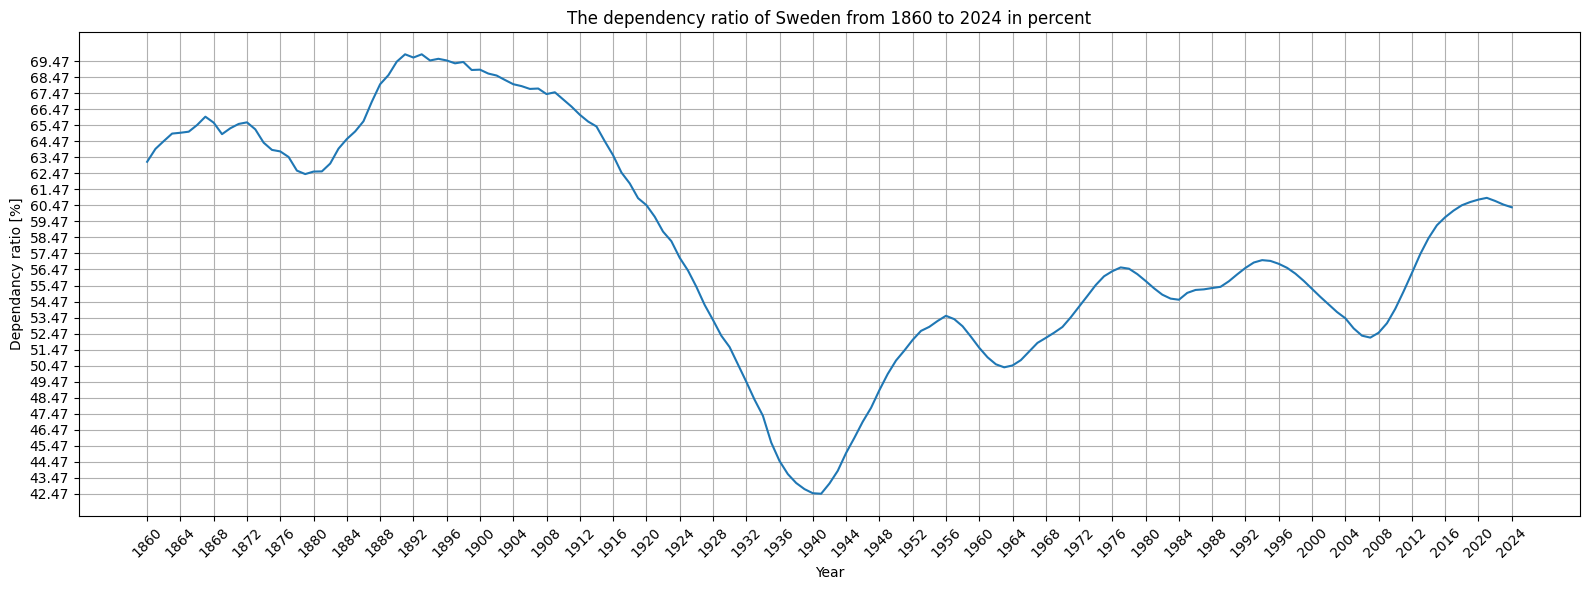

In [6]:
# Plotting the dependency ratio in Sweden by year

plt.figure(figsize=(16,6))
plt. plot(dependency_ratios["year"], dependency_ratios["dependency_ratio [%]"])
plt.xticks(dependency_ratios["year"][::4], rotation=45)
plt.yticks(np.arange(dependency_ratios["dependency_ratio [%]"].min(), dependency_ratios["dependency_ratio [%]"].max(), 1))
plt.title("The dependency ratio of Sweden from 1860 to 2024 in percent")
plt.xlabel("Year")
plt.ylabel("Dependancy ratio [%]")
plt.grid(True)
plt.tight_layout()

## Plot the fractions of children, elderly and total dependents in Sweden by year

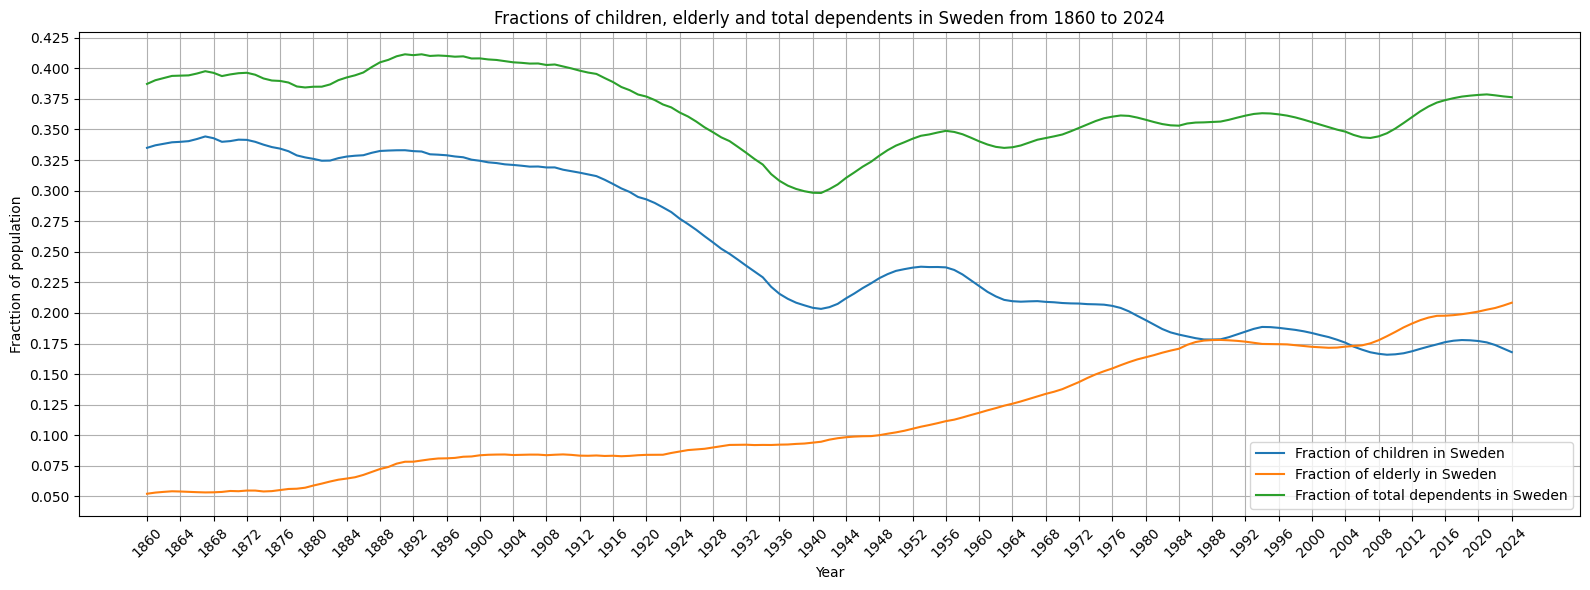

In [7]:
# Plotting the fractions of children, elderly and total dependents in Sweden each year.

plt.figure(figsize=(16,6))
plt.title("Fractions of children, elderly and total dependents in Sweden from 1860 to 2024")
plt.plot(years, categorized_df["children"]/categorized_df["totalPopulation"], label = "Fraction of children in Sweden")
plt.plot(years, categorized_df["elderly"]/categorized_df["totalPopulation"], label = "Fraction of elderly in Sweden")
plt.plot(years, categorized_df["totalDependents"]/categorized_df["totalPopulation"], label = "Fraction of total dependents in Sweden")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Fracttion of population")
plt.xticks(dependency_ratios["year"][::4], rotation=45)
plt.yticks(np.arange(0.05,0.45,0.025))

plt.grid(True)
plt.tight_layout()